# Discriminative and Generative Approaches

## Overview

* Introduction to discriminative and generative classifiers
* Discriminative classifier: **K-Nearest Neighbours**
* Generative classifier: **Naive Bayes**
* What are their advantages/limitations?


In this learning unit, you'll learn about two types of algorithms used to classify data into discrete classes.

We will discuss discriminative and generative classifiers. The k-nearest neighbours (KNN) method is an example of a discriminative classifier and uses the concept of **distance** to decide how to classify data points.

We will also discuss in detail an example of generative classifiers: Naive Bayes. 

## Discriminative and generative classifiers

Discriminative models:
* Directly model function $y = f(x)$, possibly by modelling $P(y|x)$.

Generative models: 
* Model **joint** probability $P(x,y)$ *then* derive the conditional probability  $P(y|x)$
* Allows us to generate samples for class $y$ using the underlying probability distribution 

Both require training data points with known classes. The planes where predictions for $x$ switch classes define **decision boundaries**.


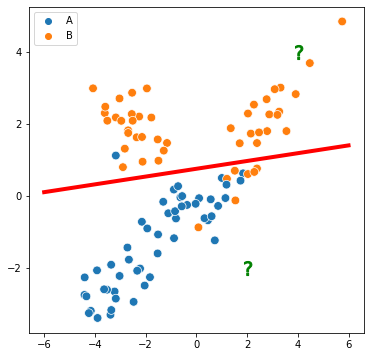

Discriminative classifiers are a type of supervised learning algorithm that require labels $y$ to learn how to classify inputs $x$. They directly model the **conditional** probability of each class given a specific observed data point's features. 

This is different from generative models, which model the joint probability distribution of $x$ and $y$ and then use that to calculate conditional probabilities of the classes given some new data. Generative models allow us to sample a value $x$ for class $y$ using the underlying probability distribution and can generate new data.

In the accompanying plot, a binary classification task is shown using two features represented by the $x$- and $y$-axes to predict a class indicated by the color of the data points. The blue and orange points represent the training data and their true labels. The red line represents an arbitrary decision boundary that separates the two classes. Note that this decision boundary doesn't have to be a straight line and could be a curve or even a more complex shape that perfectly separates the orange and blue dots.

The green question marks in the plot represent two new data points with known features but unknown class. A hypothetical discriminative classifier would label everything below the decision boundary as class $A$ and everything above as class $B$.

## Discriminative and generative classifiers
* Discriminative classifier: **K-Nearest Neighbours**
* Generative classifier: **Naive Bayes**


We will delve further into both discriminative and generative classifiers. Specifically, we will explore the k-nearest neighbors algorithm for discriminative classifiers, which estimates the conditional probability of each class by looking at the k-nearest labeled data points to the input. For generative classifiers, we will focus on Naive Bayes, which models the joint probability distribution of the features and the class, and uses Bayes' rule to obtain the conditional probability of the class given new data.

## k-nearest neighbours: form

* Training data:
    * $x \in X$ feature vectors with class labels $y_C \in \{0,1\}$ for each class $C$, where 
* Parameters:
    * $k$ = number of neighbours to use for classification
* Classification of new data point:
    * Measure distance to the training data points, $d(x_i,x_j)$
    * Most common class of $k$ nearest neighbours = prediction

Although it's rare to encapsulate all the details of a machine learning algorithm on a single slide, KNN is an exception as it is quite simple! 

As a discriminative model, it directly models the conditional probability $P(y|x)$ using the labeled training data $X$ and $y$. To classify an input point, the algorithm measures the distance between the point and all labeled data points, then selects the $k$ nearest neighbors. 

The predicted class is determined by the most prevalent class in that selection. In binary classification tasks, it is common to choose an odd value for $k$ to avoid ties, where no class can have the same number of votes.

## k-nearest neighbours: form

* Predicts $P(y|x)$ for $x \in X$
* What is the probability distribution over classes?
* For each class $c$:
    * $P(y_C|x)$ is proportion of $k$ neighbours with class $C$

Although the KNN classifier uses the majority class to make a prediction, these are easily interpreted as probabilities.

If you have two classes, `A` and `B`, and you have some point $x$ with 5 neighbours with classes `[A, A, B, B, B]`, then the overall classification is `B`.

The individual class probabilities are $P(A) = 2/5$ and $P(B) = 3/5$.

Suppose we have labeled training data $X$ and $y$, where $y$ is a list of classes and $X$ is a list of corresponding feature vectors. For example:

* $y = [\textbf{A}, \textbf{A}, \textbf{B}, \dots, \textbf{C}]$
* $X$ = $[(\textbf{f1}_1, \textbf{f2}_1), \dots, (\textbf{f1}_n, \textbf{f2}_n)]$
* Suppose we want to classify the following points: `[(0.6, 0.3), (0.8, 0.9), (0.3, 0.4)]`? What class would you select for each of these new points?

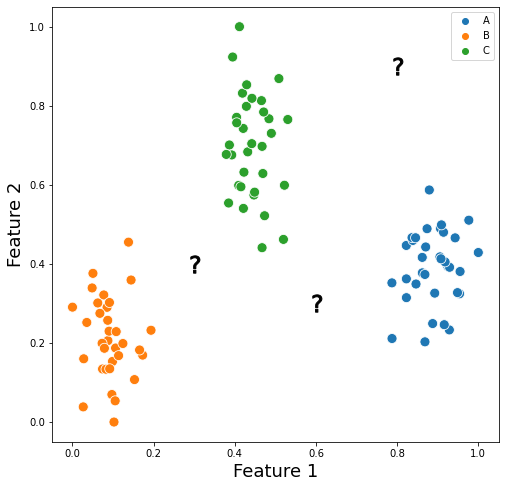

Let's go through an example.

Here, we have data points in three classes (A, B and C). Each data point has two features (F1 and F2). There could be many more features, but the 2D case is the easiest to visualise. To further aid visualisation, the three classes are nicely spread out. (In practice with real data, you are not likely to be so fortunate.)

## k-nearest neighbours: example

For each new point:
* Find 5 nearest neighbours
* Determine most common neighbour class
    * From left to right: C, A, C

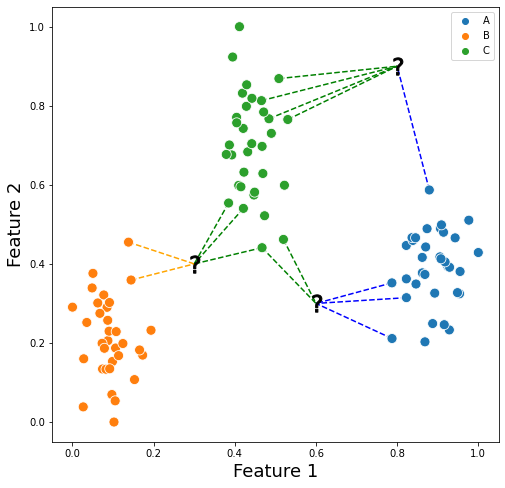

The goal is to find, for each new point, the distance to every other point. The top five points are selected and the most common class used to classify the new point.

From left to right, the associated probabilities are:

|           | A     | B     | C     |
|--------   |-----  |-----  |-----  |
| Left      | 0/5   | 2/5   | 3/5   |
| Middle    | 3/5   | 0/5   | 2/5   |
| Right     | 1/5   | 0/5   | 4/5   |


## k-nearest neighbours: example

Can use radius rather than distance:
* Set parameter $r$
* Determine most common neighbour class within radius $r$
    * From left to right: B, A, C

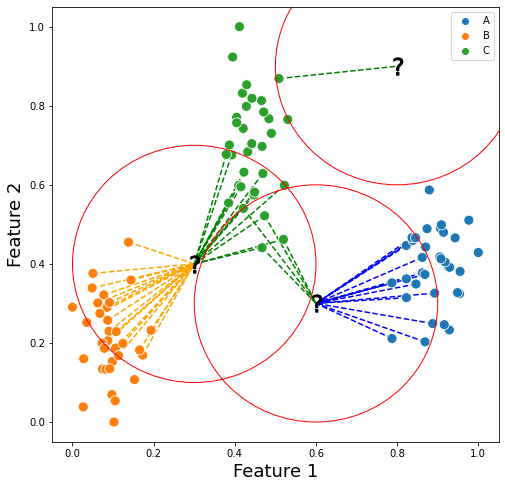

An alternative approach is to consider not simply the k-nearest neighbours, but all neighbours within a specific radius of the point you want to classify. This can be more useful if your data is quite sparse and spread out in the feature space for some classes - it keeps decision-making "local", rather than reaching out to very far away data points.

From left to right, the associated probabilities are:

|           | A     | B     | C     |
|--------   |------ |------ |------ |
| Left      | 0     | 0.58  | 0.42  |
| Middle    | 0.79  | 0     | 0.21  |
| Right     | 0     | 0     | 1     |
​
One issue is that too small a radius may result in no neighbours - a radius-based classifier would fail to classify these. The solution is to drop those points or increase the radius.

## KNN: the concept of distance

Distance $d$ between data points $x_i$ and $x_j$ for $d$ dimensional data

### Euclidean
$\sqrt{\sum_{d=1}^n {(x_i^d-x_j^d)^2}}$

### Manhattan
$\sum_{d=1}^n |x_i^d-x_j^d|$

### Minkowski
$\left(\sum_{d=1}^n |x_i^d-x_j^d|^p\right)^\frac{1}{p}$

The KNN algorithm relies on the concept of *distance* between two n-dimensional points to measure their *similarity*. There are a variety of methods for determining distances.

Euclidean distance is perhaps the most widely known one - it is the shortest, most direct, line between the points.

Manhattan distance is equivalent to traveling from one point to another in a grid pattern, such as those commonly found in American cities. There may be multiple Manhattan paths from A to B which are also the minimum distance.

The Minkowski distance generalises the above distances, and beyond, with a parameter p. When p=1, you get the Manhattan distance. And when p=2, you get the Euclidean distance.

In practice, the Manhattan distance is suited to the case where you have many features as it is more robust.

## KNN: distance = boundaries

* All known data points have a class
* Can use this to classify **all possible points**
    * Visualises the boundaries
    * Useful for interpreting the model
    
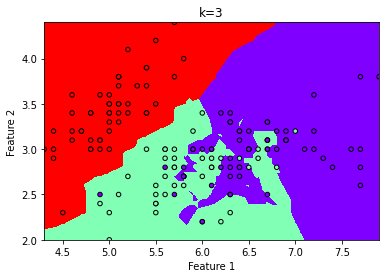

The KNN algorithm makes decisions based on the distance between data points, which can be easily visualized in 2D or 3D when there are only a few input features.

In this example, a set of labeled data points with Features 1 and 2 are used to predict one of three classes. The colors of the dots represent the different classes. By classifying every possible combination of Feature 1 and Feature 2, and coloring each pixel based on the predicted class, the decision boundaries become clearly visible.

## KNN: choosing $k$

* Small $k$:
    * rough boundary, local, risk overfitting
    
* Large $k$:
    * smooth boundary, global, risk underfitting
    
* Trade-off: **bias** vs **variance**

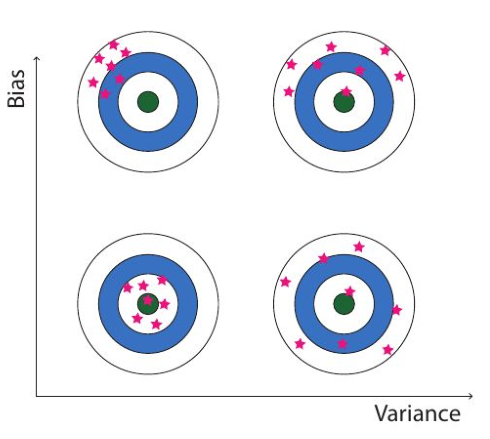

The hyperparameter $k$ in KNN is manually set, as it is not learned from the data. 

The performance of the model depends on the value chosen for $k$, resulting in high variance and low bias. 

On the other hand, if $k$ is too large, the model underfits by relying too much on global neighbors, including too much noise and resulting in high bias and low variance. 

On the other hand, if $k$ is too large, the model underfits by relying too much on global neighbors, including too much noise.

This trade-off between bias and variance is essential in machine learning. 

The ideal model should have low bias and low variance. It should capture only the most relevant relationships in the training data while remaining insensitive to noise. Underfitting and overfitting can both lead to poor performance on unseen data.

## KNN: choosing $k$

Measuring bias and variance:
* Train on one dataset
* Test on an unseen dataset

Best model minimises both train and test error.

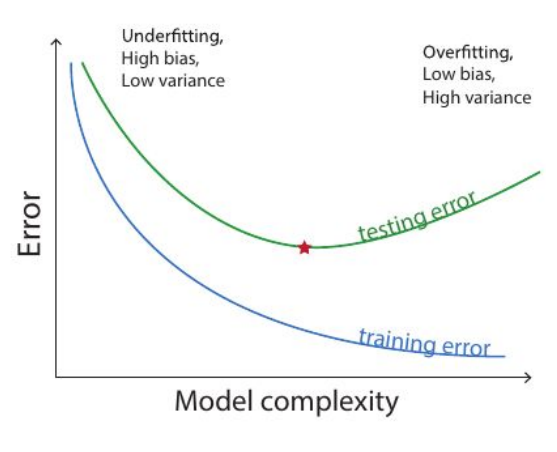
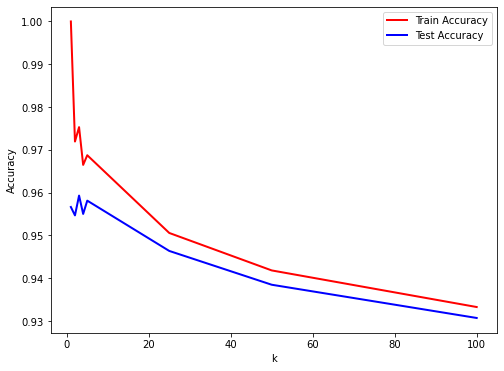

One approach for determining the optimal value of $k$ for a KNN model is to use a train/test split technique.

First, the available labeled data is divided into a training set and a test set, typically with a ratio of 9:1 or 8:2. The model is then trained on the training set using different values of $k$, where smaller values of $k$ indicate more complex models. Next, the performance of the model is evaluated on the test set using a performance metric such as accuracy or F1-score.

By repeating this process for different values of $k$, we can compare the performance of the models and select the value of $k$ that gives the best trade-off between underfitting and overfitting, in terms of generalisation performance.

This method provides a good estimate of how well the KNN model performs on unseen data, which is important in real-world applications where the model will be used on data with unknown labels.

The plot shows the accuracy of KNN models with different values of $k$, evaluated on both the train and test datasets using the train/test split method. As the number of neighbors used by the KNN model increases (i.e., higher values of $k$), the accuracy decreases for both the train and test datasets. This happens because a high $k$ means the model is using more neighbors, resulting in a high bias and low variance solution.

## KNN: considerations

* Strong performance for highly separable classes
    * Challenges with classes closer together, leading to uncertainty in classification
* Plain and intuitive interpretation of results
    * Simple algorithm, probability scores
* Computationally slow for very large datasets:
    * Need to compare each input to every known point in the training data

KNN is a simple algorithm that is easy to implement and can perform well on data that can be easily separated into distinct clusters based on their features. However, as classes become closer together, uncertainty arises, especially when a data point sits on the boundary of two classes. 

The $k$ value plays a crucial role here. KNN produces a probability distribution over possible classes, making it easy to explain and report how certain predictions are.

While training is not required, KNN still incurs a computational cost when classifying new data. Each input vector is compared to every existing data point, which can be time-consuming for large datasets with numerous new data points. There are ways to reduce this computational burden, but it is important to keep in mind.

## KNN: considerations

* Performs poorly for high dimensional input
    * The "curse of dimensionality"
* Feature values can affect performance
    * Normalize to range $[0, 1]$
* Discrete features not suited to distance measures
    * One exception to this is binary features

When working with KNN, it's important to consider the number of features in your data. As the number of features increases, the vector space they occupy becomes increasingly sparse, making data points more spread out. This can be addressed by reducing the number of features used to only the most important ones, as exponentially increasing the amount of training data may not be feasible.

In addition, the range of values for each feature can also cause issues, especially if they are of different scales. To address this, it's important to normalize all feature values to the same range. For example, `legs=[2, 4, 8]` can be transformed to `[0, 0.3, 1]`, while `weights=[64, 400, 0.2]` can be transformed to `[0.16, 1, 0]`.

Finally, it's worth noting that distance measures work best with continuous features. Discrete features, on the other hand, can make it difficult to smoothly discriminate between data points. One exception to this is binary features.

## KNN: sklearn

In [ ]:
X = [[0.1, 0.2], [0.3, 0.4], [0.4, 0.3]]
y = ['A', 'B', 'B']

new_data = [[0.15, 0.3], [0.4, 0.1]]

In [ ]:
import seaborn as sns
new_data = [[0.15, 0.3], [0.4, 0.1]]
g = sns.scatterplot(x=[i[0] for i in X+new_data],
                    y=[i[1] for i in X+new_data],
                    hue=['A', 'B', 'B', '?', '?'],
                    style=['A', 'B', 'B', '?', '?'],
                    markers=['.', '.', 'o'],
                    s=200)

sns.mpl.pyplot.show()

g.set_xlabel('Feature 1');
g.set_ylabel('Feature 2');

Here are the original points of class A and B, plotted in a 2D scatterplot and coloured blue and orange.

How will a KNN (with `k=2`) classify the two new green points? How certain will it be?

## KNN: sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X, y);

accuracy = knn.score(X, y)

class_predict = knn.predict(new_data)
class_probs = knn.predict_proba(new_data)

In [ ]:
print(f"Accuracy: {accuracy}\n")
print(f"Predictions: {class_predict}\n")
print(f"Probs: {class_probs}\n")

`sklearn` implements KNN (and the radius version) with a very straight-forward interface.

The model is instantiated and $k$ is set.

The model is trained using the `.fit()` method.

The `.score()` method of a trained model can be used to calculate accuracy of the model on some known data.

Getting class predictions is done via the `.predict()` method. Passing a list of new data points returns a prediction for each one.

To get the associated probabilities of each class for each data point, use the `.predict_proba()` method.

The model is absolutely certain about one point (both nearest neighbours had the same class), but split 50/50 on the other (each nearest neighbour had a different class).


### Practical

Discriminative Classifiers:

* `discriminative_classifiers.ipynb`


## Introduction to Naive Bayes classifiers

Now that we have covered KNN as an example of a discriminative method, let's discuss Naive Bayes as an example of a generative method.

* Idea: use Bayes' rule to find the probability $p(y_C|x)$ of class $C$ given data $x$

* We can then apply a probability threshold to generate discrete predictions, e.g. for a binary problem: 

$$
\hat{y} = 
\begin{cases}
1 & p(y|x)\geq0.5 \\
0 & p(y|x)<0.5
\end{cases}
$$

### Bayes' Rule

* we often need to determine the probability of a certain class $y$ given the available data $x$, which can be expressed as $p(y|x)$.

* Bayes' rule allows us to calculate this probability using the conditional probability formula and the product rule:
$$p(y|x)=\frac{p(y, x)}{p(x)}=\frac{p(x|y)p(y)}{p(x)}$$

* To make a prediction, we simply choose the class $y$ with the highest probability.

* In our notation, we use capital letters $X$ and $Y$ to represent the random variables that correspond to the features and the class, respectively. Lowercase letters $x$ and $y$ are used to denote their specific values (e.g. $y$ can be *dog*).

For probabilistic classification, the goal is to calculate the probability of a class $y$ given a set of data $x$, denoted by $p(y|x)$. 

However, this is often not directly obtainable from the data. To find this probability, we can use the conditional probability formula and combine it with the product rule, resulting in Bayes' rule as shown in the slide. To make predictions, we choose the class $y$ with the highest probability. 

For clarity in notation, we use capital letters for random variables, which represent features, and lowercase letters for the specific values these features can take. A random variable is named so because its value depends on the outcome of a random process. For instance, capital $Y$ can represent a random variable for the class, while lowercase $y$ represents a specific value that this random variable can take, such as "dog".

Bayes' rule:
$$p(y|x)=\frac{p(y, x)}{p(x)}=\frac{p(x|y)p(y)}{p(x)}$$

Here is a brief explanation of each term in the formula:
* $p(y|x)$: posterior probability
    * The probability of class $y$ given that we have seen data $x$.
* $p(x|y)$: model likelihood
    * The probability of observing data $x$ if the true class is $y$.
* $p(y)$: prior probability of class $y$
    * The probability of class $y$ if we have not observed (i.e. do not know) $x$?
* $p(x)$: normalization
    * A normalization factor that makes sure the probabilities $p(y|x)$ sum to 1 over all possible values of $y$. It does not affect which class is the most likely given the observed data $x$.

Explanation:

- $p(y|x)$ is the posterior probability, which represents the probability of class $y$ given the observation of data $x$. In other words, it's the probability of the hypothesis (class) given the evidence (data). This is what we want to estimate in machine learning problems, as we want to predict the class label based on the given input data.

- $p(x|y)$ is the model likelihood, which represents the probability of observing the data $x$ given that the class label is $y$. This is what the machine learning algorithm learns from the training data.

- $p(y)$ is the prior probability of class $y$, which represents our belief about the probability of class $y$ before observing any data. In other words, it's the probability of the hypothesis (class) before considering the evidence (data).

- $p(x)$ is the normalization constant, which ensures that the posterior probabilities sum up to 1 over all possible values of the class labels. It is calculated by marginalizing the joint probability distribution of $p(y,x)$ over all possible values of $y$.

Bayes' rule allows us to update our belief about an event (in this case, the class label) based on the evidence (the input data).





Bayes' rule:
$$p(y|x)=\frac{p(y, x)}{p(x)}=\frac{p(x|y)p(y)}{p(x)}$$

* For $N$ classes, $p(x)$ can be expanded using the sum and product rule:
$$p(x)=\sum_{i=1}^N p(x|y_i)p(y_i)$$

* In practice, $p(x)$ can be skipped as it is enough to know that $p(y|x)$ is proportional to $p(x|y)p(y)$ (posterior $\propto$ likelihood $\times$ prior).

* Values of $p(x|y)$ and $p(y)$ can be easily estimated using the data. 

The formula for Bayes' rule includes a term $p(x)$, which serves as a normalization constant. We can expand this term using the sum and product rule, where $N$ represents the number of classes, and $i$ denotes the class being considered. The resulting formula is shown on the slide.

However, in practice, we can skip the $p(x)$ term, as it is enough to know that the posterior probability $p(y|x)$ is proportional to the likelihood $p(x|y)$ times the prior $p(y)$. In other words, the posterior is proportional to the product of the likelihood and the prior.

To apply Bayes' rule, we need to estimate the values of $p(x|y)$, which represents the model likelihood, and $p(y)$, which represents the prior. Fortunately, these values can be easily estimated using the data.

The concept behind Naive Bayes is straightforward: use Bayes' rule to determine the probability $p(y|x)$ of class $y$ based on the given data $x". However, applying Bayes' rule directly is not enough as there are several challenges that we will explore shortly.

We previously derived Bayes' rule using the conditional probability formula and product rule, which is shown on the slide. We make predictions by selecting the most probable class $y$.

## Naive Bayes Classifiers

Generative classifier:
* Naive Bayes tries to model probability a point belongs to class $y$ if it has value $x$
* Allows us to sample a value $x$ for class $y$ using the underlying probability distribution - "generate data"
* Discriminative classifiers (e.g. logistic regression) do not generate data
    * They model class boundary rather than probability distribution

Naive Bayes is an example of a generative classifier - the reason for this is that Naive Bayes tries to model probability a point belongs to class $y$ if it has value $x$. The approach allows us to select a class $y$ and then sample an observation $x$ based on the underlying probability distribution - in other words "generate data". 

This approach differs from discriminative classifiers like logistic regression, which model the class boundary rather than the probability distribution and do not allow for data generation.

## Naive Bayes Classifiers

In practice, we often deal with many features for a point, $N$ instead of one. $N$ could be 1000, and each feature can take 2 values, resulting in $2^{1000}$ possible combinations. 

Challenge: Estimating $p(x_1, x_2, ..., x_N|y)$ from data becomes a challenge, as it's highly unlikely to observe all possible combinations of values:
* **Curse of dimensionality**: as the number of dimensions increases, it becomes increasingly difficult to obtain enough data.

Solution: make a simplifying assumption called the "Naive" assumption. We assume that the features are conditionally independent of each other:
* Estimate the probabilities separately for each feature value instead of their combination


When dealing with machine learning problems, we often encounter a large number of features, typically $N$ rather than just one. For instance, in computer vision problems, features can correspond to pixel values. When each feature takes only two values, and $N=1000$ we end up with $2^{1000}$ possible combinations, posing a challenge in estimating $p(x_1, x_2, ..., x_N|y)$ from data. This phenomenon is commonly referred to as the curse of dimensionality. 

To address this issue, Naive Bayes offers a simple solution: it assumes that the features are independent of each other and estimates the probabilities separately for each feature value rather than their combination.

## Naive Bayes Classifiers:

Deriving the posterior probability using Bayes' Rule.

* Recall, using the product rule, the model likelihood is expressed as:
$$
\begin{aligned}
 p(x_1, x_2, ..., x_N|y) &=p(x_1|y)p(x_2|x_1,y)...p(x_N|x_1, x_2, ..., x_{N-1}, y) \\
  &= \prod_{i=1}^N p(x_i|x_1, x_2, ..., x_{i-1}, y)
\end{aligned}
$$

* Assume the $N$ features are conditionally independent given the class:
$$
\begin{aligned}
 p(x_1, x_2, ..., x_N|y) &=p(x_1|y)p(x_2|y)...p(x_N|y) \\
  &= \prod_{i=1}^N p(x_i|y)
\end{aligned}
$$

In the Naive Bayes classifier, we assume that the features are conditionally independent given the class label. This assumption simplifies the computation of the likelihood.

## Naive Bayes classifiers

Returning to Bayes' rule:

* Naive Bayes classifiers assume that $p(y_C|x_1, x_2, ..., x_N)$ is **proportional** to $p(x_1|y_C)...p(x_N|y_C)p(y_C)$
* This proportionality is sufficient to identify the most likely class.

So, how can we estimate these terms?
* The prior probability $p(y_C)$ can be estimated from the training data as the proportion of instances that belong to each class.
    * By default, it is set to $N_C/N$ (number of examples from class $C$ over number of all examples)
* The likelihood probabilities $p(x_i|y_C)$ can be estimated from the training data by fitting a probability distribution to the values of each feature for each class.
     * For continuous $x_i$, we use a **Gaussian** distribution
     * For ordinal $x_i$, we use a **Multinomial** distribution
     * For binary $x_i$, we use a **Bernoulli** distribution
     
    
The parameters of each distribution are determined by fitting the training data using maximum likelihood estimation.

The likelihood probabilities $p(x_i|y)$ can be estimated from the training data by fitting a probability 
Naive Bayes classifier applies Bayes' rule to perform classification, taking advantage of the conditional independence assumption. This rule states that the likelihood of a particular class for the given data is proportional to the product of the probabilities of observing the specific feature values for that class, multiplied by the prior probability of the class. Since proportionality is enough to determine the most likely class, we do not need to normalize it.

The formula presented at the top of the slide consists of two main components: the prior probability $p(y)$, which can be specified and typically calculated as the ratio of the number of examples from class $C$ to the total number of examples, and the product of $p(x_i|y)$ for different $i$ values. These probabilities can be modeled using different probability distributions, depending on the feature type. For continuous features, we can use the Gaussian distribution. For ordinal features, we can use the Multinomial distribution. For binary features, we can use the Bernoulli distribution.

To fit the parameters of each distribution, we can use maximum likelihood estimation on the training data. `sklearn` provides different versions of Naive Bayes classifiers, such as `GaussianNB`, `MultinomialNB`, and `BernoulliNB`. In this practical, we will use `GaussianNB`, but they all work similarly, and the choice depends on the feature type. More information about them is available [here](https://scikit-learn.org/stable/modules/naive_bayes.html).

## Modelling continuous features

To model continuous features, we can use a Gaussian distribution to represent the probabilities $p(x_i|y)$. The Gaussian distribution is defined by two parameters: the mean $\mu_{x_i,y}$ and the variance $\sigma^2_{x_i,y}$ for feature $x_i$ and class $y$. We can calculate these parameters by averaging the feature values across $N$ examples:

$$\mu_{x_i,y}=\frac{1}{N}\sum_{j=1}^N x_{i}^{(j)}$$
$$\sigma^2_{x_i, y}=\frac{1}{N}\sum_{j=1}^N \left(x_{i}^{(j)}-\mu_{x_i,y}\right)^2$$

Then, we can use the Gaussian distribution to compute $p(x_i|y)$ as:

$$p(x_i|y)=\frac{1}{\sqrt{2\pi\sigma^2_{x_i,y}}}\exp\left(-\frac{\left(x_i-\mu_{x_i,y}\right)^2}{2\sigma^2_{x_i, y}}\right)$$

## Limitations of Naive Bayes
* Issue with zero counts:
    * If the probability for a value of one feature is zero (e.g., $p(x_3|y)=0$), the posterior probability will also be zero.
    * Solution: add a small value to each count (**smoothing**) to avoid zero probabilities.

* Assumption of conditional independence:
    * In reality, some features can be conditionally dependent.
    * This assumption can be problematic and may lead to incorrect classification, such as in spam detection.

Naive Bayes is a simple method, but it does have some limitations. One limitation is its problem with zero counts in the simple version. If the probability for a value of one feature is 0 (e.g., $p(x_3|y)=0$), the posterior probability will be 0. This is not desirable, e.g. in spam classification, many words (attributes) will have zero probability (words unseen in the training set), yet we still want to use them in classification. To solve this issue, a small value is added to each count (smoothing) so that there are no 0 probabilities.

The second limitation is the conditional independence assumption. In practice, some features can be conditionally dependent, and this assumption can lead to false classification, especially in spam classification.

Naive Bayes has several benefits which make it a popular choice for classification problems:

* It can handle missing values for a feature. If a feature has a missing value, we can simply ignore it for that example. Specifically, if $x_j$ is missing, then we can compute the conditional probability as $p(x_1,x_2,..., x_N|y) = \prod_{i\neq j}^N p(x_i|y)$.

* Naive Bayes allows us to estimate uncertainty in the prediction by looking at the probabilities.

* It is a fast algorithm, making it suitable for large datasets with many features.

Naive Bayes has some notable benefits that make it a useful method. Firstly, it can handle missing values for a feature by simply ignoring the feature for an example that has a missing value. In such a scenario, the probability of the other features is used to make the prediction. This is a convenient way to deal with missing data without needing to impute or drop samples. 

Secondly, Naive Bayes allows us to look at the probabilities and estimate the uncertainty in the prediction. Unlike other algorithms that only return a binary prediction, Naive Bayes provides the probability of each class, giving us an idea of how certain the prediction is. 

Finally, Naive Bayes is computationally efficient since it only requires a few calculations to find the probabilities. This makes it a useful method for large datasets or real-time applications.

## Summary

* Discriminative models:
    * Directly model classes $Y$, given features of training examples $X$
    * Use decision boundaries to classify new data
    * Boundaries based on similarity: distance, separation, etc.
    * Avoids limitation of conditional independence of features and observed data given labels
    * No uncertainty estimates
    
* Generative models:
    * Model the underlying joint probability distribution to classify new data
    * Can generate data from the probability distribution
    * Relationship between class and features are explicit and easy to visualize 

We covered both discriminative and generative approaches, with K-Nearest Neighbors serving as an example of the former and Naive Bayes as an example of the latter.

Discriminative models learn the conditional distribution of the class labels given the input features, typically using some notion of similarity to create boundaries that allow the model to assign class labels to new inputs.

Generative models, on the other hand, model the underlying joint probability distribution of both the input features and the class labels. This allows them not only to classify new data, but also to generate new data samples from the learned probability distribution.

### Practical

Generative Classifiers:

* `generative_classifiers.ipynb`